In [3]:
'''Basic Review: Convolutional Neural Networks do awesome.
    Lets take a very trivial image of a cat. A CNN accepts two dimensional inputs.
    Convolution has a goal to locate features of an image.
    Lets take 3x3 pixel arrays. It will look for edges, curves and what these edges build like triangles, squares etc
    Then it slides this array over and tries to find these features in each part
    Then we make an array of numbers which the machine reads as features.
    Then it drastically simplifies your image into a bunch of feature.
    The first layer is just makes very very basic features like a corner or a edge.
    The next layer sees combinations of features into something more advanced and so on.
'''

'Basic Review: Convolutional Neural Networks do awesome.\n    Lets take a very trivial image of a cat. A CNN accepts two dimensional inputs.\n    Convolution has a goal to locate features of an image.\n    Lets take 3x3 pixel arrays. It will look for edges, curves and what these edges build like triangles, squares etc\n    Then it slides this array over and tries to find these features in each part\n    Then we make an array of numbers which the machine reads as features.\n    Then it drastically simplifies your image into a bunch of feature.\n    The first layer is just makes very very basic features like a corner or a edge.\n    The next layer sees combinations of features into something more advanced and so on.\n'

In [4]:
#Here we make use of the Kaggle Cats vs Dogs Dataset from Microsoft
#Link: https://www.microsoft.com/en-us/download/details.aspx?id=54765
#I have also added it on the Github page
#So every image has a cat or a dog. It's the Neural Network's job to determine which is which

In [27]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False    # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
#NOTICE THAT ALL IMAGES ARE OF DIFFERENT SIZE
#So we resize all of them to 50x50 for generalization. Sure, it distorts them but for most cases, they
# still look like dogs

    CATS = "kagglecatsanddogs_5340/PetImages/Cat"
    DOGS = "kagglecatsanddogs_5340/PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    catcount = 0
    dogcount = 0

    def make_training_data(self):
        # iterates over cats and dogs
        for label in self.LABELS:
            print(label)
            #we will see why we need tqdm, the following for loop goes to every picture in the Cats Directory and the DOgs directory
            for f in tqdm(os.listdir(label)) :
                try:
                    path = os.path.join(label, f) #eg: --path--/PetImages/Cat/2.jpeg
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  #converts into greyscale #Goal: SIMPLIFY! SIMPLIFY! SIMPLIFY!
                    # we are converting to grayscale because color is not exactly something we need to differentiate
                    # between cats and dogs so grayscale makes our job easier.
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE)) #Resizes images into 50x50 
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
        #We're using one hot vectors here. [1, 0] indicates cats and [0, 1] indicates a dog 
                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                        
                        
                except Exception as e:   
                    #print(str(e))
                    pass
                    
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)  
        print("Cats: ", self.catcount)
        print("Dogs: ", self.dogcount)
        
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()       
                           
             
        




In [16]:
training_data = np.load("training_data.npy", allow_pickle=True)

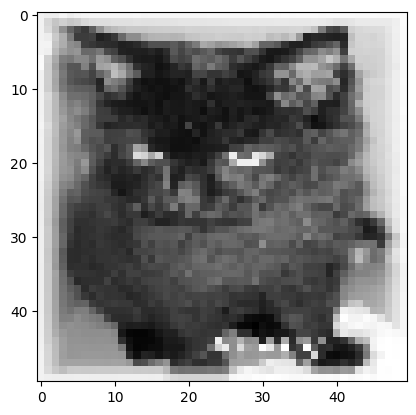

In [26]:
import matplotlib.pyplot as plt

plt.imshow(training_data[280][0], cmap="gray")
plt.show()

In [29]:
###############################
######NOW FOR THE PYTORCH######
###############################

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)     #makes 5x5 kernel as it rolls over the window
        self.conv2 = nn.Conv2d(32, 64, 5) 
        self.conv3 = nn.Conv2d(64, 128, 5)
        
        x = torch.randn(50,50).view(-1, 1, 50, 50)
        self._to_linear = None
        #What are thhe dimensions for the Linear layer? 
        #First we pass a random data through the neural network and see the dimensions of it after the three layer. just multiply dimensions and you have your flattenend data
        self.convs(x)
        
        #self.fc1 = nn.Linear()
        #self.fc2 = nn.Linear(512, 2)    #2 classes- Cats and Dogs
        
        
    def convs(self, x):
        # max pooling over 2x2
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x    